<a href="https://colab.research.google.com/github/prissyyy/Studi-Independen/blob/main/30-SL10_ChatbotAI-Sederhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selasa, 27 Okt 2021 (AI Chatbot with NLP)

# AI Chatbot in Python
> Chatbot sederhana ini menggunakan konsep sederhana penerapan Cosine Similarity

> Disini program Chatbot dibuat dengan sesuai kebutuhan pengguna, jadi kita bisa memilih apakah harus membuat program ini bisa bekerja pada topik tertentu, misalnya untuk Chatbot berbasis Covid-19, atau yang lainnya yang sedang relevan.

SUMBER MATERI

[Towards Data Science](https://towardsdatascience.com/making-a-simple-and-fast-chatbot-in-10-minutes-2d84a4ba35e)

[Youtube](https://youtu.be/9KZwRBg4-P0)

# Tools Scraping Artikel

Pada program kali ini kita akan mengambil teks dari internet menggunakan tools newspaper3k, dimana tools ini memiliki beberapa kelebihan yaitu:
1. Kerangka kerja dalam mengunduh artikel yang multi-thread
2. Dapat mengidentifikasi URL baru
3. Mampu mengekstraksi teks dari HTML
4. Terbaik dalam hal ekstraksi gambar dari HTML
5. Mampu mengekstraksi semua gambar dari HTML
6. Dapat mengekstraksi kata kunci dari teks
7. Dapat mengekstrak ringkasan teks
8. Dapat mengekstraksi nama penulis suatu artikel
9. Dapat mengekstraksi istilah yang sedang trend di mesin pencarian Google
10. Dapat bekerja lebih dari 10 bahasa (termasuk Inggris, Jerman, Arab, China, dll)

In [1]:
!pip install newspaper3k

     |████████████████████████████████| 211 kB 7.7 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
     |████████████████████████████████| 7.4 MB 25.3 MB/s 
     |████████████████████████████████| 81 kB 1.1 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=297c72f4a32b3c8dd4d434f059b076e14b3e6fe5e0a845369e6a889bb86a0769
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=b07dd282398124e1142748819b1ecdeac2f6b06f70b53585be7a6699a682cddf
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=d83befc532e1c4ea292aff0cd784361f9617fec632bff3274538766be39554bf
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [2]:
# Import Library
from newspaper import Article
import random # untuk membangkitkan nilai random
import nltk # tools untuk NLP
import string # untuk fungsi string
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('punkt', quiet=True)

True

# Proses 1 (Membuat korpus dengan mendownload artikel dari sebuah link)

Link dapat diganti dengan link teks berbhasa Indonesia, tetapi kali ini kita mencoba menggunakan teks berbahasa Inggris terlebih dahulu. 

In [7]:
article = Article('https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521')
article.download()
article.parse()
article.nlp()
corpus = article.text

In [8]:
corpus

"Overview\n\nChronic kidney disease, also called chronic kidney failure, involves a gradual loss of kidney function. Your kidneys filter wastes and excess fluids from your blood, which are then removed in your urine. Advanced chronic kidney disease can cause dangerous levels of fluid, electrolytes and wastes to build up in your body.\n\nIn the early stages of chronic kidney disease, you might have few signs or symptoms. You might not realize that you have kidney disease until the condition is advanced.\n\nTreatment for chronic kidney disease focuses on slowing the progression of kidney damage, usually by controlling the cause. But, even controlling the cause might not keep kidney damage from progressing. Chronic kidney disease can progress to end-stage kidney failure, which is fatal without artificial filtering (dialysis) or a kidney transplant.\n\nHow kidneys work Show transcript for video How kidneys work One of the important jobs of the kidneys is to clean the blood. As blood moves 

# Proses 2 (Tokenization)

In [9]:
# Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text)

# Print the list of sentence
print(sentence_list)

['Overview\n\nChronic kidney disease, also called chronic kidney failure, involves a gradual loss of kidney function.', 'Your kidneys filter wastes and excess fluids from your blood, which are then removed in your urine.', 'Advanced chronic kidney disease can cause dangerous levels of fluid, electrolytes and wastes to build up in your body.', 'In the early stages of chronic kidney disease, you might have few signs or symptoms.', 'You might not realize that you have kidney disease until the condition is advanced.', 'Treatment for chronic kidney disease focuses on slowing the progression of kidney damage, usually by controlling the cause.', 'But, even controlling the cause might not keep kidney damage from progressing.', 'Chronic kidney disease can progress to end-stage kidney failure, which is fatal without artificial filtering (dialysis) or a kidney transplant.', 'How kidneys work Show transcript for video How kidneys work One of the important jobs of the kidneys is to clean the blood.

# Proses 3 (Bot Response)

Bot respon digunakan untuk membuat sebuah percakapan awal antara pengguna dengan bot, jadi disini user dapat menyapa bot, nah untuk kata-kata dapat diganti sesuai dengan kebutuhan, misalnya bahasa indonesia. 

Pada percakapan awal tidak menggunakan ML atau metode lainnya, program hanya menjawab dengan kata yang di cocokkan sebagai input.

In [10]:
# a function to return a random greeting response to a users greeting
def greeting_response(text):
  text = text.lower()

  # Bots greeting respond
  bot_greetings = ['howdy', 'hai', 'hello','hola']

  # Users greeting
  user_greetings = ['hi', 'hey', 'hello', 'greetings', 'wassup']

  for word in text.split():
    if word in user_greetings:
      return random.choice(bot_greetings)

  # Random response to greeting
  def gratitude_response(text):
    text = text.lower()

1. Pada list kode bot_greetings itu bentuk kata sapaan bot terhadap sapaan yang kita berikan, dan dapat diganti dengan bahasa Indonesia atau lainnya.
2. Sedangkan, pada list user_greetings itu kata sapaan input dari user dan dapat diganti dengan bahasa lainnya.

# Sorting List

In [11]:
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0, length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]]:
        #swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

  return list_index

# Chatbot Respon Menggunakan Cosine Similarity

Pada respon bot menggunakan teknis Cosine Similarity untuk menghitung kata yang cocok dengan yang di input user terhadap respon dari Bot

In [12]:
# Creat Bots Response
def bot_response(user_input):
    user_input=user_input.lower()
    sentence_list.append(user_input)
    bot_response= ''
    cm=CountVectorizer().fit_transform(sentence_list)
    similarity_scores=cosine_similarity(cm[-1],cm)
    similarity_scores_list=similarity_scores.flatten()
    index=index_sort(similarity_scores_list)
    index=index[1:]
    response_flag=0
    
    j=0
    for i in range(len(index)):
        if similarity_scores_list[index[i]]>0.0:
            bot_response=bot_response+' '+sentence_list[index[i]]
            response_flag=1
            j=j+1
        if j>2:
            break

        if response_flag==0:
            bot_response=bot_response+" "+"I apologize, I dont understand"

        sentence_list.remove(user_input) 

        return bot_response

Pada listing kode >bot_response=bot_response+" "+"I apologize, I dont understand" pada list kode ini kata I apologize tujuannya untuk memberikan respon karena sistem tidak mengenali kata yang kita input, jadi sebagai bentuk respon bot kepada user. Kata tersebut bisa diganti dengan bahasa Indonesia, misalnya "Maaf saya tidak mengetahui arti atau tidak mengenali kata-kata yang di input".

# Proses 4 (End Process, Making Chat Box)

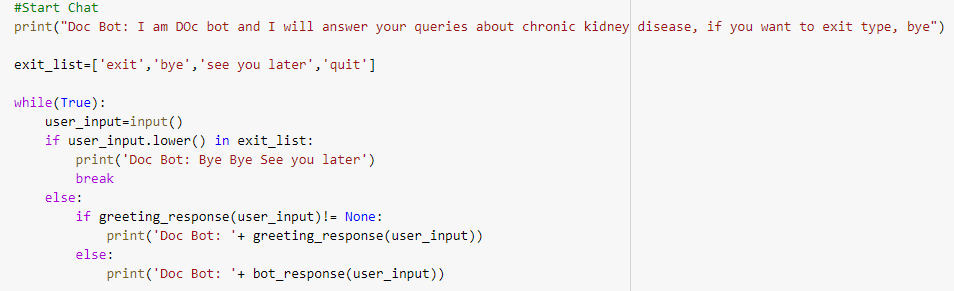

In [18]:
#Start Chat
print("Doc Bot: I am DOc bot and I will answer your queries about chronic kidney disease, if you want to exit type, bye  ?")

exit_list=['exit','bye','see you later','quit']

while(True):
    user_input=input()
    if user_input.lower() in exit_list:
        print('Doc Bot: Bye Bye See you later')
        break
    else:
        if greeting_response(user_input)!= None:
            print('Doc Bot: '+ greeting_response(user_input))
        else:
            print('Doc Bot: '+ bot_response(user_input))

Doc Bot: I am DOc bot and I will answer your queries about chronic kidney disease, if you want to exit type, bye  ?
what is symptoms
Doc Bot:  Symptoms

Signs and symptoms of chronic kidney disease develop over time if kidney damage progresses slowly.
symptoms
Doc Bot:  Symptoms

Signs and symptoms of chronic kidney disease develop over time if kidney damage progresses slowly.
how kidney work
Doc Bot:  Causes

Healthy kidney vs. diseased kidney Open pop-up dialog box Close Healthy kidney vs. diseased kidney Healthy kidney vs. diseased kidney A typical kidney has about 1 million filtering units.
exit
Doc Bot: Bye Bye See you later


In [ ]:
# Buat pertanyaan pada kolom diatas seperti : what is chronic kidney disease?, dll.

# AI Chatbot Versi Bahasa **Indonesia**

## Proses 1 (Making Corpus with Download an Article)

In [19]:
article = Article('https://warstek.com/kabel-laut/')
article.download()
article.parse()
article.nlp()
corpus = article.text
print(corpus)

Telkomsel, Indihome, dan Kabel Laut JaSuKa

Pada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome. Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik fixed maupun mobile broadband di beberapa wilayah Indonesia. Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar. Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan. Netizen pun banyak berkomentar negatif terkait hal ini. Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan.

Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak. Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan. Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat berjalan sebaik mungkin, meski tentu tidak s

## Proses 2 (Tokenization)

In [20]:
# Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text) #A list of senetences

# Print the list of sentences
print(sentence_list)

['Telkomsel, Indihome, dan Kabel Laut JaSuKa\n\nPada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome.', 'Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik fixed maupun mobile broadband di beberapa wilayah Indonesia.', 'Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar.', 'Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan.', 'Netizen pun banyak berkomentar negatif terkait hal ini.', 'Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan.', 'Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak.', 'Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan.', 'Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat berjalan sebaik m

In [22]:
#a function to return a random greeting response to a users greeting
def greeting_response(text):
    text = text.lower()
    
    #Bots greeting respone
    bot_greetings = ['halo','hai','yuhuu','*eyebrows up*']
    
    #Users greeting
    user_greetings = ['Haloo','Eh iyaa Haii','Hai','greetings','wassup']
    
    for word in text.split():
        if word in user_greetings:
            return random.choice(bot_greetings)
        
    #Random response to greeting
    def gratitude_response(text):
        text=text.lower()   

In [23]:
def index_sort(list_var):
    length = len(list_var)
    list_index = list(range(0, length))
    
    x = list_var        
    for i in range(length):
        for j in range(length):
            if x[list_index[i]] > x[list_index[j]]:
                #swap
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp
                
    return list_index

In [24]:
# Creat Bots Response
def bot_response(user_input):
    user_input=user_input.lower()
    sentence_list.append(user_input)
    bot_response= ''
    cm=CountVectorizer().fit_transform(sentence_list)
    similarity_scores=cosine_similarity(cm[-1],cm)
    similarity_scores_list=similarity_scores.flatten()
    index=index_sort(similarity_scores_list)
    index=index[1:]
    response_flag=0
    
    j=0
    for i in range(len(index)):
        if similarity_scores_list[index[i]]>0.0:
            bot_response=bot_response+' '+sentence_list[index[i]]
            response_flag=1
            j=j+1
        if j>2:
            break

        if response_flag==0:
            bot_response=bot_response+" "+"Maaf, Saya tidak paham dengan yang anda tanyakan"

        sentence_list.remove(user_input) 

        return bot_response

# Proses 4 (End Process, Making chat box)

In [25]:
#Start Chat
print("Doc Bot: Mau nanya apa kamu tentang kabel laut")

exit_list=['exit','bye','keluar','quit', 'sampai jumpa']

while(True):
    user_input=input()
    if user_input.lower() in exit_list:
        print('Doc Bot: Bye Bye Sampai jumpa lagi')
        break
    else:
        if greeting_response(user_input)!= None:
            print('Doc Bot: '+ greeting_response(user_input))
        else:
            print('Doc Bot: '+ bot_response(user_input))

Doc Bot: Mau nanya apa kamu tentang kabel laut
kabel laut
Doc Bot:  Jaringan Kabel Laut di Indonesia

Kabel laut yang ada di negeri kita juga cukup banyak.
kabel laut adalah
Doc Bot:  Jaringan Kabel Laut di Indonesia

Kabel laut yang ada di negeri kita juga cukup banyak.
internet
Doc Bot:  Ya, Internet itu ada di Bawah Laut

Internet sering diasosiasikan dengan kata cloud atau wireless sehingga kita merasa bahwa internet itu dibawa oleh udara di sekitar kita.
apa itu internet
Doc Bot:  Ya, Internet itu ada di Bawah Laut

Internet sering diasosiasikan dengan kata cloud atau wireless sehingga kita merasa bahwa internet itu dibawa oleh udara di sekitar kita.
telkomsel
Doc Bot:  Telkomsel, Indihome, dan Kabel Laut JaSuKa

Pada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome.
Ada apa dengan telkomsel
Doc Bot:  Banyaknya vote: 3 Belum ada yang menilai!
kampus merdeka
Doc Bot:  Maaf, Saya tidak paham dengan yang anda tanyakan
bye
Doc Bot: B

Doc Bot ganti dengan ini atau sesuai dengan topik yang lagi di bahas, print("Doc Bot: Mau nanya apa kamu tentang kabel laut?")

In [26]:
# Coba pertanyaan:
# kabel laut adalah
# kabel laut untuk komunikasi internasional adalah
# dll.

## Activity (3-5 kelompok dalam 30-60 menit)
- Buatlah bot sederhana dengan topik tertentu. Data (knowledge base) boleh berasal dari mana saja, disesuaikan dengna topik yang ingin diambil. 
- Wajib menggunakan versi Bahasa Inggris dan Bahasa Indonesia.
- Gunakan beberapa artikel agar bot memiliki pengetahuan yang lebih luas.
- Silahkan di improve kode sekreatif kalian agar chatbot memiliki kemampuan yang cukup baik dalam merespon. Gunakan materi atau teknik preprocessing yang sudah kalian pelajari kemarin.
- Buat simulasi pertanyaan dan tampilkan hasilnya (contoh output).
- Jawaban tidak ada yang benar atau yang salah, yang terpenting bot mampu memberi respon yang baik sesuai dengan topik yang dibahas.